<a href="https://colab.research.google.com/github/shrad1997/Forecasting/blob/main/Forecasting_CocaColaPrice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  

In [2]:
data = pd.read_excel("/content/CocaCola_Sales_Rawdata.xlsx")
data.head()



,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


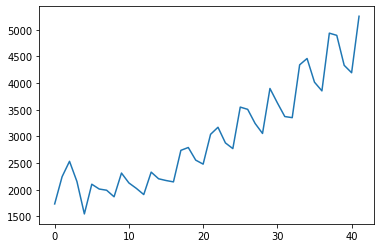

In [3]:
data.Sales.plot()

In [4]:
data.shape

(42, 2)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Quarter  42 non-null     object 
 1   Sales    42 non-null     float64
dtypes: float64(1), object(1)
memory usage: 800.0+ bytes


In [6]:
data.describe()

,Sales
count,42.000000
mean,2994.353308
std,977.930896
min,1547.818996
25%,2159.714247
50%,2782.376999
75%,3609.250000
max,5253.000000


In [7]:
import numpy as np
#quarter=['Q1','Q2','Q3','Q4']
n=data['Quarter'][0] #Selecting first row in coloumn Quarter
n[0:2] #then selecting first two position from Q1_86 that is Q1

'Q1'

In [8]:
data['quarter']=0 

In [9]:
data.head(5)

,Quarter,Sales,quarter
0,Q1_86,1734.827000,0
1,Q2_86,2244.960999,0
2,Q3_86,2533.804993,0
3,Q4_86,2154.962997,0
4,Q1_87,1547.818996,0


In [10]:
for i in range(42): #creating a for loop for creating seprate coloumn with only quarters
    n=data['Quarter'][i]
    data['quarter'][i]=n[0:2]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [11]:
dummy=pd.DataFrame(pd.get_dummies(data['quarter']))

In [12]:
data=pd.concat((data,dummy),axis=1)
t= np.arange(1,43)
data['t']=t
data['t_square']=data['t']*data['t']

In [13]:
log_Sales=np.log(data['Sales'])
data['log_Sales']=log_Sales

In [14]:
data.head(10)

,Quarter,Sales,quarter,Q1,Q2,Q3,Q4,t,t_square,log_Sales
0,Q1_86,1734.827000,Q1,1,0,0,0,1,1,7.458663
1,Q2_86,2244.960999,Q2,0,1,0,0,2,4,7.716443
2,Q3_86,2533.804993,Q3,0,0,1,0,3,9,7.837477
3,Q4_86,2154.962997,Q4,0,0,0,1,4,16,7.675529
4,Q1_87,1547.818996,Q1,1,0,0,0,5,25,7.344602
5,Q2_87,2104.411995,Q2,0,1,0,0,6,36,7.651791
6,Q3_87,2014.362999,Q3,0,0,1,0,7,49,7.608058
7,Q4_87,1991.746998,Q4,0,0,0,1,8,64,7.596767
8,Q1_88,1869.049999,Q1,1,0,0,0,9,81,7.533186
9,Q2_88,2313.631996,Q2,0,1,0,0,10,100,7.746574


In [15]:
data['year']=(data.Quarter.str.split('_').str[1])

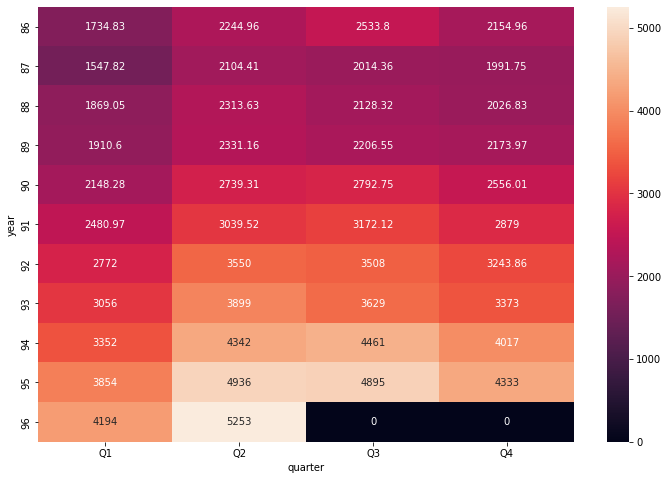

In [16]:

plt.figure(figsize=(12,8))
heatmap_year= pd.pivot_table(data=data,values="Sales",index="year",columns="quarter",aggfunc="mean",fill_value=0)
sns.heatmap(heatmap_year,annot=True,fmt="g")

In [17]:
data.head(10)

,Quarter,Sales,quarter,Q1,Q2,Q3,Q4,t,t_square,log_Sales,year
0,Q1_86,1734.827000,Q1,1,0,0,0,1,1,7.458663,86
1,Q2_86,2244.960999,Q2,0,1,0,0,2,4,7.716443,86
2,Q3_86,2533.804993,Q3,0,0,1,0,3,9,7.837477,86
3,Q4_86,2154.962997,Q4,0,0,0,1,4,16,7.675529,86
4,Q1_87,1547.818996,Q1,1,0,0,0,5,25,7.344602,87
5,Q2_87,2104.411995,Q2,0,1,0,0,6,36,7.651791,87
6,Q3_87,2014.362999,Q3,0,0,1,0,7,49,7.608058,87
7,Q4_87,1991.746998,Q4,0,0,0,1,8,64,7.596767,87
8,Q1_88,1869.049999,Q1,1,0,0,0,9,81,7.533186,88
9,Q2_88,2313.631996,Q2,0,1,0,0,10,100,7.746574,88


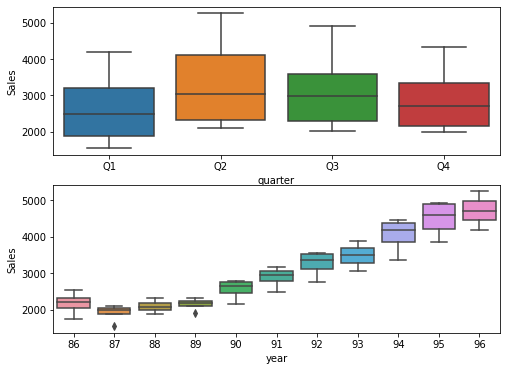

In [18]:
# Boxplot for ever
plt.figure(figsize=(8,6))
plt.subplot(211)
sns.boxplot(x="quarter",y="Sales",data=data)
plt.subplot(212)
sns.boxplot(x="year",y="Sales",data=data)

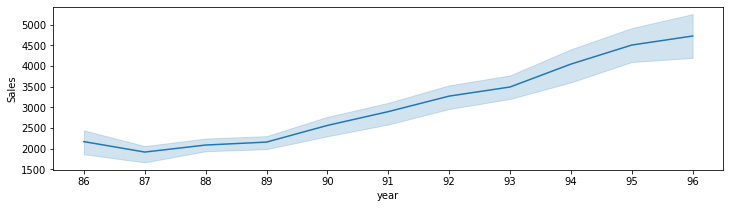

In [19]:
plt.figure(figsize=(12,3))
sns.lineplot(x="year",y="Sales",data=data) 

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


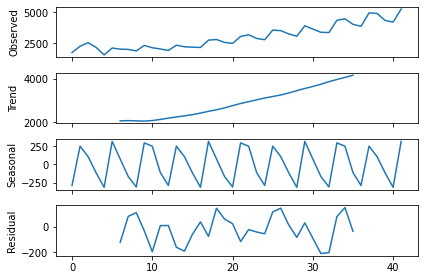

In [20]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_ts_add = seasonal_decompose(data.Sales,freq=12)
decompose_ts_add.plot()
plt.show() 

In [21]:
data=data.drop(['year'],axis=1)

#Splitting data

In [22]:
Train= data.head(38)
Test=data.tail(4)


In [23]:
#Linear Model
import statsmodels.formula.api as smf 

linear_model = smf.ols('Sales~t',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_linear))**2)) 
rmse_linear

591.553295722396

In [24]:
#Exponential

Exp = smf.ols('log_Sales~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp 

466.2479731067161

In [25]:
#Quadratic 

Quad = smf.ols('Sales~t+t_square',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_square"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_Quad))**2))
rmse_Quad 

475.5618351831482

In [26]:
#Additive seasonality 

add_sea = smf.ols('Sales~Q1+Q2+Q3+Q4',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['Q1','Q2','Q3','Q4']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_add_sea))**2))
rmse_add_sea 

1860.0238154547276

In [27]:
#Additive Seasonality Quadratic 

add_sea_Quad = smf.ols('Sales~t+t_square+Q1+Q2+Q3+Q4',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['Q1','Q2','Q3','Q4','t','t_square']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad 

301.73800719353056

In [28]:
##Multiplicative Seasonality

Mul_sea = smf.ols('log_Sales~Q1+Q2+Q3+Q4',data = Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea 

1963.3896400779734

In [29]:
#Multiplicative Additive Seasonality 

Mul_Add_sea = smf.ols('log_Sales~t+Q1+Q2+Q3+Q4',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea  

225.52439049826233

In [30]:
#Compare the results 

data1 = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(data1)
table_rmse.sort_values(['RMSE_Values']) 

,MODEL,RMSE_Values
6,rmse_Mult_add_sea,225.524390
4,rmse_add_sea_quad,301.738007
1,rmse_Exp,466.247973
2,rmse_Quad,475.561835
0,rmse_linear,591.553296
3,rmse_add_sea,1860.023815
5,rmse_Mult_sea,1963.389640


#Predict for new time period


In [31]:
data.head(10)

,Quarter,Sales,quarter,Q1,Q2,Q3,Q4,t,t_square,log_Sales
0,Q1_86,1734.827000,Q1,1,0,0,0,1,1,7.458663
1,Q2_86,2244.960999,Q2,0,1,0,0,2,4,7.716443
2,Q3_86,2533.804993,Q3,0,0,1,0,3,9,7.837477
3,Q4_86,2154.962997,Q4,0,0,0,1,4,16,7.675529
4,Q1_87,1547.818996,Q1,1,0,0,0,5,25,7.344602
5,Q2_87,2104.411995,Q2,0,1,0,0,6,36,7.651791
6,Q3_87,2014.362999,Q3,0,0,1,0,7,49,7.608058
7,Q4_87,1991.746998,Q4,0,0,0,1,8,64,7.596767
8,Q1_88,1869.049999,Q1,1,0,0,0,9,81,7.533186
9,Q2_88,2313.631996,Q2,0,1,0,0,10,100,7.746574


In [32]:
data1=data.drop(['Sales'],axis=1)
data1=data.drop(['t_square'],axis=1)

In [33]:
#Build data on entire dataset
model=smf.ols('log_Sales~t+Q1+Q2+Q3+Q4',data =data1).fit()

In [36]:
pred_new  = pd.Series(model.predict(data1)) 
pred_new  

0     7.339224
1     7.579747
2     7.571328
3     7.491254
4     7.435892
5     7.676415
6     7.667996
7     7.587922
8     7.532561
9     7.773084
10    7.764665
11    7.684591
12    7.629229
13    7.869752
14    7.861333
15    7.781259
16    7.725898
17    7.966421
18    7.958002
19    7.877928
20    7.822566
21    8.063089
22    8.054670
23    7.974596
24    7.919235
25    8.159758
26    8.151339
27    8.071265
28    8.015903
29    8.256426
30    8.248007
31    8.167933
32    8.112572
33    8.353095
34    8.344676
35    8.264602
36    8.209240
37    8.449763
38    8.441344
39    8.361270
40    8.305909
41    8.546432
dtype: float64